<a href="https://colab.research.google.com/github/hadavikr/NYC-Taxi-Trip-Time-Prediction---Capstone-Project/blob/main/Vikrant_Hada_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

# Objective:

**To Explore various attributes and build a Predictive model that predicts the total trip duration of taxi trips in New York City.**

## Architecture :-

Data Preparation and Exploratory Data Analysis > Build Predictive Model using Multiple Techniques/Algorithms > Optimal Model identified through Testing and Evaluation

# Importing necessary libraries & Loading Dataset

In [1]:
#importing required packages

import pandas as pd #data processing
import numpy as np  #linear algebra

#data visualisation
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import datetime as dt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading the dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML- NYC Taxi /Copy of NYC Taxi Data.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
#Shape of data 

print ('No. of Examples(rows): ',df.shape[0])
print ('No. of Features(columns) : ', df.shape[1])

No. of Examples(rows):  1458644
No. of Features(columns) :  11


In [5]:
#Columns in our data

df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

**Independent Variables**


- id — a unique identifier for each trip
- vendor_id — a code indicating the provider associated with the trip record
- pickup_datetime — date and time when the meter was engaged
- dropoff_datetime — date and time when the meter was disengaged
- passenger_count — the number of passengers in the vehicle (driver entered value)
- pickup_longitude — the longitude where the meter was engaged
- pickup_latitude — the latitude where the meter was engaged
- dropoff_longitude — the longitude where the meter was disengaged
- dropoff_latitude — the latitude where the meter was disengaged
- store_and_fwd_flag — This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server — Y=store and forward; N=not a store and forward trip.

**Target Variable**
- trip_duration — duration of the trip in seconds

#  Data Cleaning
 Checking for Dtype and Null Values

In [6]:
df.info() #Attribute information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


 - We have id, pickup_datetime, dropoff_datetime, and store_and_fwd_flag of the type ‘object’.
 - vendor_id, passenger_count, and trip_duration are of type int.
 - pickup_longitude, pickup_latitude, dropoff_longitude, and dropoff_latitude are of type float.

In [7]:
df.duplicated().sum()   #Checking for Duplicated rows

0

In [8]:
df.isnull().sum() #checking for missing values

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

As we can see there is no null or missing values in our data set which saves us a step of imputing.

Now Let us check for unique values of all columns.

In [9]:
print(df.nunique().sort_values()) #Checking for unique values

vendor_id                   2
store_and_fwd_flag          2
passenger_count            10
trip_duration            7417
pickup_longitude        23047
dropoff_longitude       33821
pickup_latitude         45245
dropoff_latitude        62519
pickup_datetime       1380222
dropoff_datetime      1380377
id                    1458644
dtype: int64


[link text](https://)
*   We see that id has 1458644 unique values which are equal to the number of rows in our dataset. 
*   There are 2 unique vendor ids.
*   There are 10 unique passenger counts.
*   There are 2 unique values for store_and_fwd_flag, that we also saw in the description of the variables, which are Y and N.



In [10]:
df.describe() #statistical summary of our data set for numeric data column

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


Text(0.5, 1.0, 'Descriptive Stats')

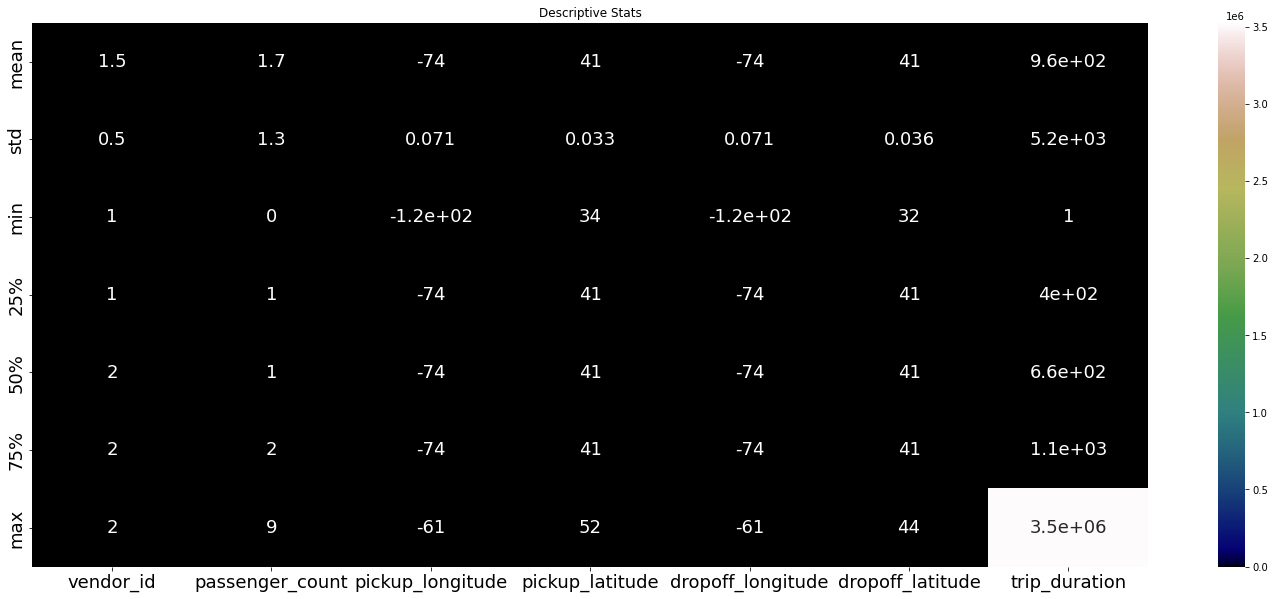

In [11]:
#Descriptive Stats in visual form

plt.figure(figsize=(25,10))
svm = sns.heatmap(df.describe()[1:], annot=True, cmap='gist_earth',annot_kws={"size": 18})
svm.set_xticklabels(svm.get_xmajorticklabels(), fontsize = 18)
svm.set_yticklabels(svm.get_ymajorticklabels(), fontsize = 18)

plt.title('Descriptive Stats')

- We can observe that there were trips having 0 passengers which we can consider as false trip.


- Also, there are trips having trip duration upto 3526282 seconds (Approx. 980 hours) which is kind of impossible in a day.

# Feature Creation

 - Let us create some new features from the existing variables so that we can gain more insights from the data.

 - Remember pickup_datetime and dropoff_datetime were both of type object.
If we want to make use of this data, we can convert it to datetime object which contains numerous functions with which we can create new features that we will see soon.


In [12]:
# Now will analyze this features
#  2   pickup_datetime     1458644 non-null  object 
#  3   dropoff_datetime    1458644 non-null  object

# We can convert it to datetime using the following code.

df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

Now if you will run the dtypes function again, you will be able to see the type as datetime64.

Now, let us extract and create new features from this datetime features we just created.

In [13]:
df['pickup_month'] = df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_hour']=df['dropoff_datetime'].dt.hour

df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
df['dropoff_weekday']=df['dropoff_datetime'].dt.weekday

df['pickup_day'] = df['pickup_datetime'].dt.day
df['dropoff_day']=df['dropoff_datetime'].dt.day

df['pickup_date'] = df['pickup_datetime'].dt.date

df['pickup_min'] = df['pickup_datetime'].dt.minute
df['dropoff_min'] = df['dropoff_datetime'].dt.minute

- The Date and time columns in the Dataset has whole lot story to tell, we have to fetch them as separate features. 


- We do not have to extract pickup and dropoff time both, as they may lead to strong positive correlation between them. (For analysis purpose obviosly we can extract)


- Further we can use these columns for Analysis.

Now let us apply this function and create new columns in the dataset.

# Feature Engineering - Total Distance Travelled


Importing the library which lets us calculate distance from geographical coordinates.

Source - https://stackoverflow.com/questions/24427828/calculate-point-based-on-distance-and-direction

In [14]:
from geopy.distance import great_circle

In [15]:
#calc_distance is a function to calculate distance between pickup and dropoff coordinates.


def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

Finally, applying the function to our dataset and creating the feature ‘distance’.

In [16]:
#Calculate distance and assign new column to the dataframe.

df['distance'] = df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [17]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour,dropoff_hour,pickup_weekday,dropoff_weekday,pickup_day,dropoff_day,pickup_date,pickup_min,dropoff_min,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,17,17,0,0,14,14,2016-03-14,24,32,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,0,0,6,6,12,12,2016-06-12,43,54,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,11,12,1,1,19,19,2016-01-19,35,10,6.385108
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,19,19,2,2,6,6,2016-04-06,32,39,1.485501
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,13,13,5,5,26,26,2016-03-26,30,38,1.188590


In [18]:
#Check the type of each variable
df.dtypes.reset_index()

,index,0
0,id,object
1,vendor_id,int64
2,pickup_datetime,datetime64[ns]
3,dropoff_datetime,datetime64[ns]
4,passenger_count,int64
5,pickup_longitude,float64
6,pickup_latitude,float64
7,dropoff_longitude,float64
8,dropoff_latitude,float64
9,store_and_fwd_flag,object


In [19]:
# EDA & Data Preprocessing